## EDA: Exploratory Data Analysis.

Now comes the fun part: let's make some data! We're going to want a large data set of scores from the Perfect VP for analysis. I've already written a helper function on [station.py](https://github.com/gavinraym/Boxcar/blob/master/src/station.py) that can be used for this purpose. From the src directory, run the file from the terminal and enter 1 at the menu, or use the take_sample function directly. Input 'perfect', 100, and 'sample' for the vp, number of games, and filename. It will use the Perfect VP to play games of Boxcar and write the scores to a file. The scores, once computed, can be used in the next cell. 

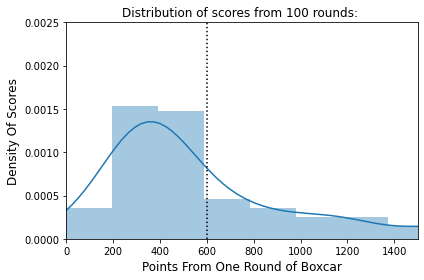

"I'm calling this distribution a **Perfect Distribution**. This not just because we are using the Perfect VP! The most perfect distribution that I can image is any that is still a good puzzle."

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
df = pd.read_csv('../data/sample1.csv')
ax = sns.distplot(df) 
ax.set_ylim(0,.0025)
ax.set_xlim(0,1500)
ax.set_xlabel('Points From One Round of Boxcar', fontsize=12)
ax.set_ylabel('Density Of Scores', fontsize=12) 
ax.axvline(df['score'].mean(), color='k', linestyle=':')
plt.title(f'Distribution of scores from {len(df)} rounds: ', y=1 )
plt.savefig('../images/perfect_distibution.png', format='png')
plt.tight_layout()
plt.show()
plt.close()
"I'm calling this distribution a **Perfect Distribution**. This not just because we are using the Perfect VP! The most perfect distribution that I can image is any that is still a good puzzle."

### The Perfect Distribution

As you can see, the distribution of scores is very unusual! Let me save you some time and tell you that distributions of scores from other VP's will vary from this one in ways that are very difficult to analyze visually. Because of this, we will instead compare the **mean scores** of each player. A VP's mean score, shown here as a black dotted line, will give us a great statistic for comparing different play styles.

Using *mean score* will only help us compare our VP's if we calculate it appropriately. Mainly, if we use too few samples, the result will not be accurate. We can demonstrate this using another function that I added to station.py. This time, run menu option 2. It will run tests of the Perfect VP with varying numbers of samples, and record only the mean score from each test. The next cell will display it's results.

*Note: Calculating the optimal sample size will take a long time, expecially on slower computers. You can reduce the time by adjusting the functions parameters. Use the default settings if possible, or try starting at 1000, stopping at 5000, and stepping at 1000 for really slow machines.*

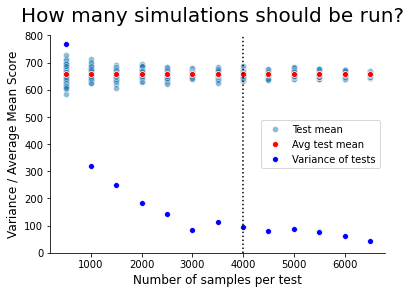

"Here, the word 'sample' refers to one round of Boxcar. The x-axis is increasing number of samples per test. The function we used to generate this data uses a default of only 25 samples per test to save time, but we should up this number substantially when testing our VP's for real."

In [3]:
fig, ax = plt.subplots()
df = pd.read_csv('../data/batchtests.csv')
mean = df.groupby('size').mean()
var = df.groupby('size').var()

# Plotting data
ax = sns.scatterplot(df['size'], 
                     df['mean_score'], 
                     alpha=.5,
                     label='Test mean')
ax = sns.scatterplot(mean['mean_score'].index,
                     mean['mean_score'],
                     color = 'r',
                     label='Avg test mean')
ax = sns.scatterplot(var['mean_score'].index,
                     var['mean_score'],
                     color='b',
                     label='Variance of tests')

# Making the plot look better
ax.set_xlabel('Number of samples per test', fontsize=12)
ax.set_ylabel('Variance / Average Mean Score', fontsize=12) 
plt.ylim(bottom=0, top=800);
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.suptitle('How many simulations should be run?', fontsize=20)
ax.axvline(4000, color='k', linestyle=':')
plt.legend()
plt.savefig('../images/sim_size_test.png', format='png')
plt.show()
plt.close()
'''Here, the word 'sample' refers to one round of Boxcar. \
The x-axis is increasing number of samples per test. \
The function we used to generate this data uses a default \
of only 25 tests per grouping to save time, but we should up this \
number substantially when testing our VP's for real.'''

From this graph we can see that the more samples we take per test, the less variance there is between tests. It also becomes apparent that if we want a truly accurate mean score, we should take the average of many tests. Moving forward I will be using the average score mean from 200 test, each made up of a sample of 4000 simulations. This will give us enough accuracy for our project without being overly demanding computationally. Of course, you are free to experiment with different amounts if you would like!

Now that you see what a difference taking a larger sample can make, you might want to rerun our original distribution test at the top of this notebook, this time at 4,000 samples instead of 100. You will likely see a much better representation of the Perfect VP's distribution of scores. If you do, you will find that it is right skewed, with a mean around 650. There is a large spike of scores around 300, then smaller humps at 600-800 and 1000-1200 points. What do you think would cause it to be this way?

In the next chapter, we will introduce two more VP's. After running some more simulations (Don't worry, they'll be much shorter from now on!), we will compare the distribution of means for each. 